## MUHAMMAD FAJRIN MIRSAD

## POSTTEST 6

# Import Library

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import Dataset

In [ ]:
df = pd.read_csv('Airlines.csv')

In [4]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [5]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [6]:
df.drop(columns='id', inplace=True)
df.select_dtypes(['int64' , 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Flight     539383 non-null  int64
 1   DayOfWeek  539383 non-null  int64
 2   Time       539383 non-null  int64
 3   Length     539383 non-null  int64
 4   Delay      539383 non-null  int64
dtypes: int64(5)
memory usage: 20.6 MB


In [7]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   AirportFrom  539383 non-null  object
 2   AirportTo    539383 non-null  object
dtypes: object(3)
memory usage: 12.3+ MB


# Remove Outliner

In [8]:
from scipy import stats

df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) < 3).all(axis=1)]

In [10]:
df2 = df.drop(['AirportFrom', 'AirportTo'], axis = 1)
df2

,Airline,Flight,DayOfWeek,Time,Length,Delay
0,CO,269,3,15,205,1
1,US,1558,3,15,222,1
2,AA,2400,3,20,165,1
3,AA,2466,3,20,195,1
4,AS,108,3,30,202,0
...,...,...,...,...,...,...
539378,CO,178,5,1439,326,0
539379,FL,398,5,1439,305,0
539380,FL,609,5,1439,255,0
539381,UA,78,5,1439,313,1


## DNN

# Split Dataset

In [11]:
X = df[['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']]
y = df['Airline']

In [12]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [15]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [16]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


# Compile Model

In [20]:
model = Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=[5]), #Input Layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output Layer
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit Model

In [23]:
model.fit(X_train, y_train, epochs = 20,validation_split=0.2)


Epoch 1/20
10590/10590 [==============================] - 54s 5ms/step - loss: -1170942.7500 - accuracy: 0.0831 - val_loss: -1736493.0000 - val_accuracy: 0.0833
Epoch 2/20
10590/10590 [==============================] - 53s 5ms/step - loss: -2451849.7500 - accuracy: 0.0831 - val_loss: -3245782.2500 - val_accuracy: 0.0833
Epoch 3/20
10590/10590 [==============================] - 54s 5ms/step - loss: -4186691.7500 - accuracy: 0.0831 - val_loss: -5207778.0000 - val_accuracy: 0.0833
Epoch 4/20
10590/10590 [==============================] - 54s 5ms/step - loss: -6372079.0000 - accuracy: 0.0831 - val_loss: -7620848.5000 - val_accuracy: 0.0833
Epoch 5/20
10590/10590 [==============================] - 55s 5ms/step - loss: -9007115.0000 - accuracy: 0.0831 - val_loss: -10482113.0000 - val_accuracy: 0.0833
Epoch 6/20
10590/10590 [==============================] - 54s 5ms/step - loss: -12086699.0000 - accuracy: 0.0831 - val_loss: -13788780.0000 - val_accuracy: 0.0833
Epoch 7/20
10590/10590 [=======

# Accuracy

In [24]:
model.evaluate(X_test, y_test)

3310/3310 [==============================] - 12s 4ms/step - loss: -106948744.0000 - accuracy: 0.0833


[-106948744.0, 0.08325228095054626]

In [28]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns
from keras import Sequential
from keras.layers import Dense

In [ ]:
# Grafik

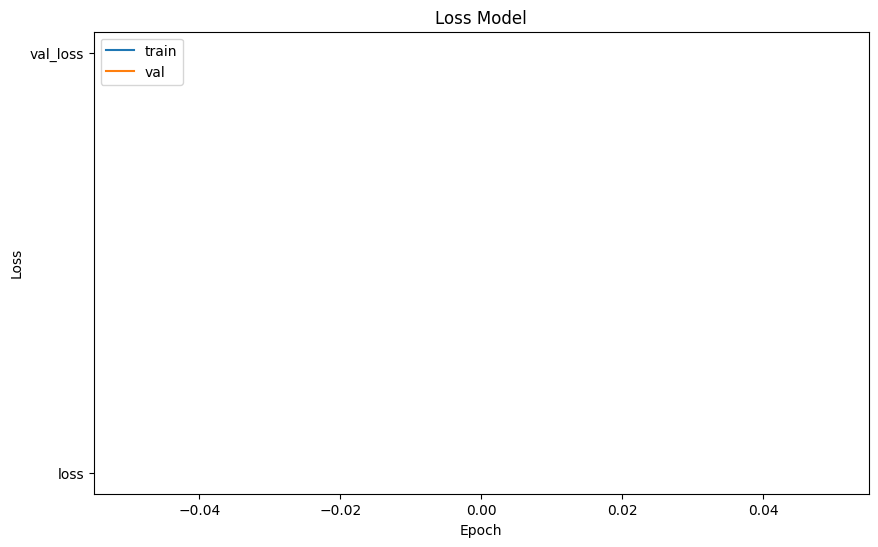

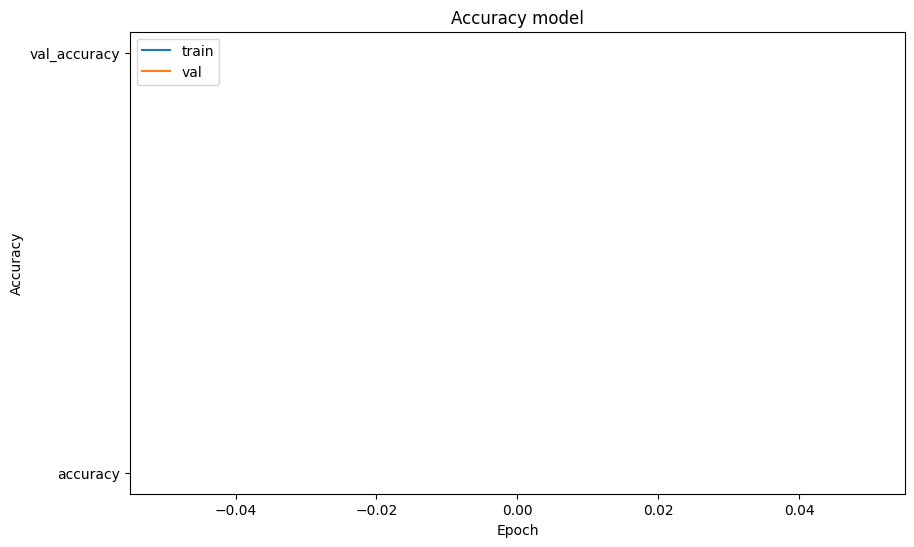

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(['loss'])
plt.plot(['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure(figsize=(10, 6))
plt.plot(['accuracy'])
plt.plot(['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()